In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://www.rasmussenreports.com/public_content/politics/obama_administration/obama_approval_index_history'
url_1='https://www.rasmussenreports.com/public_content/politics/trump_administration/trump_approval_index_history'
url_2 ='https://www.rasmussenreports.com/public_content/politics/biden_administration/biden_approval_index_history'
url_3 = 'https://www.usinflationcalculator.com/inflation/historical-inflation-rates/'

In [4]:
tables = pd.read_html(url)
tables_1 = pd.read_html(url_1)
tables_2 = pd.read_html(url_2)
table_3 = pd.read_html(url_3)

In [5]:
df_obama=tables[0]
df_trump = tables_1[0]
df_biden=tables_2[0]
# df_biden["rename"] = df_biden.loc[df_biden["Total Approve"] - df_biden["Total Disapprove"]]
df_inflR = table_3[0]
df_inflR

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7


In [7]:
df_biden1 = df_biden.drop(df_biden[df_biden["Approval Index"] == "No Polling - Fourth of July"].index)
df_biden2 = df_biden1.drop(df_biden1[df_biden1["Approval Index"] == "No Polling - Thanksgiving"].index)
df_biden3 = df_biden2.drop(df_biden2[df_biden2["Approval Index"] == "No Polling - Christmas"].index)
# count = df_biden3["Approval Index"].value_counts()
df_biden3= df_biden3.dropna(how='any')
df_biden3.reset_index(drop=True, inplace=True)
# 
df_biden3[['Total_Approve','sign']] = df_biden3["Total Approve"].str.split('%', 1, expand=True)
df_biden3[['Total_Disapprove','sign1']] = df_biden3["Total Disapprove"].str.split('%', 1, expand=True)
df_biden3['Total_Approve']=df_biden3['Total_Approve'].astype(int)
df_biden3['Total_Disapprove']=df_biden3['Total_Disapprove'].astype(int)
df_biden3['Relative_Approval'] = df_biden3['Total_Approve'] - df_biden3['Total_Disapprove']
df_biden3['Neutral'] = 100- (df_biden3['Total_Approve'] + df_biden3['Total_Disapprove'] )
del df_biden3['Approval Index']
del df_biden3['Strongly Approve']
del df_biden3['Strongly Disapprove']
del df_biden3['sign']
del df_biden3['sign1']
df_biden3['Date'] = pd.to_datetime(df_biden3['Date'])
df_biden3.sort_values(by='Date')
# df_biden4 = df_biden3.set_index("Date") 
df_biden3.to_csv("static/data/biden_approval.csv", index=True)
df_b4 = df_biden3["Date"]
df_b4.to_csv("static/data/bdate.txt", header=None, index=None, sep='\t', mode='a')
# df_biden3.to_json("static/data/biden_approval.json", index = True)

# from flask import json
# return render_template("sample.html",test=json.dumps(test))
df_b4.head()

0   2022-07-14
1   2022-07-13
2   2022-07-12
3   2022-07-11
4   2022-07-08
Name: Date, dtype: datetime64[ns]

In [23]:
datex = df_biden3['Date'].tolist()
relativex = df_biden3['Relative_Approval'].tolist()


([Timestamp('2022-07-13 00:00:00'),
  Timestamp('2022-07-12 00:00:00'),
  Timestamp('2022-07-11 00:00:00'),
  Timestamp('2022-07-08 00:00:00'),
  Timestamp('2022-07-07 00:00:00'),
  Timestamp('2022-07-06 00:00:00'),
  Timestamp('2022-07-01 00:00:00'),
  Timestamp('2022-06-30 00:00:00'),
  Timestamp('2022-06-29 00:00:00'),
  Timestamp('2022-06-28 00:00:00'),
  Timestamp('2022-06-27 00:00:00'),
  Timestamp('2022-06-24 00:00:00'),
  Timestamp('2022-06-23 00:00:00'),
  Timestamp('2022-06-22 00:00:00'),
  Timestamp('2022-06-21 00:00:00'),
  Timestamp('2022-06-20 00:00:00'),
  Timestamp('2022-06-17 00:00:00'),
  Timestamp('2022-06-16 00:00:00'),
  Timestamp('2022-06-15 00:00:00'),
  Timestamp('2022-06-14 00:00:00'),
  Timestamp('2022-06-13 00:00:00'),
  Timestamp('2022-06-10 00:00:00'),
  Timestamp('2022-06-09 00:00:00'),
  Timestamp('2022-06-08 00:00:00'),
  Timestamp('2022-06-07 00:00:00'),
  Timestamp('2022-06-06 00:00:00'),
  Timestamp('2022-06-03 00:00:00'),
  Timestamp('2022-06-02 00:0

In [40]:
# datex1 = list(df_biden3['Date'].timeuple())
# datex1

AttributeError: 'Series' object has no attribute 'timeuple'

In [37]:
# biden_dict ={"Date" :  datex, 
#             "Relative_Approval" :  relativex}
# json_object = json.dumps(biden_dict) 
# # print(json_object)

# out_file = open("myfile.json", "w") 
# json.dump(json_object, out_file) 
# out_file.close()


# bi_date = {"Date": datex}
# json_object1 = json.dumps(bi_date) 
# out_file = open("bi_date.json", "w") 
# json.dump(json_object1, out_file) 
# out_file.close()

# bi_appr = {"": relativex}
# json_object1 = json.dumps(bi_appr) 
# out_file = open("bi_appr.json", "w") 
# json.dump(json_object1, out_file) 
# out_file.close()

In [15]:
df_obama.head()
df_obama1 = df_obama.drop(df_obama[df_obama["Approval Index"] == "No Polling - New Years Eve"].index)
df_obama2 = df_obama1.drop(df_obama1[df_obama1["Approval Index"] == "No Polling--Mothers Day"].index)
df_obama3 = df_obama2.drop(df_obama2[df_obama2["Approval Index"] == "No Polling - Mothers Day"].index)
df_obama4 = df_obama3.drop(df_obama3[df_obama3["Approval Index"] == "No Polling - New Years Day"].index)
df_obama5 = df_obama4.drop(df_obama4[df_obama4["Approval Index"] == "No Polling - New Years"].index)
# 
df_obama6 = df_obama5.drop(df_obama5[df_obama5["Total Approve"] == "No Polling"].index)
df_obama7 = df_obama6.drop(df_obama6[df_obama6["Total Approve"] == "No Polling - Thanksgiving"].index)
df_obama8 = df_obama7.drop(df_obama7[df_obama7["Total Approve"] == "No Polling - Christmas"].index)
df_obama9 = df_obama8.drop(df_obama8[df_obama8["Total Approve"] == "No Polling - Fourth of July"].index)
df_obama9a = df_obama9.drop(df_obama9[df_obama9["Total Approve"] == "No Polling - New Years"].index)
df_obama9b = df_obama9a.drop(df_obama9a[df_obama9a["Total Approve"] == "No polling"].index)

df_obama9b= df_obama9b.dropna(how='any')
df_obama9b.reset_index(drop=True, inplace=True)
# count = df_obama9b["Total Disapprove"].value_counts()
# count
df_obama9b[['Total_Approve','sign']] = df_obama9b["Total Approve"].str.split('%', 1, expand=True)
df_obama9b[['Total_Disapprove','sign1']] = df_obama9b["Total Disapprove"].str.split('%', 1, expand=True)
df_obama9b['Total_Approve']=df_obama9b['Total_Approve'].astype(int)
df_obama9b['Total_Disapprove']=df_obama9b['Total_Disapprove'].astype(int)
df_obama9b['Relative_Approval'] = df_obama9b['Total_Approve'] - df_obama9b['Total_Disapprove']
df_obama9b['Neutral'] = 100- (df_obama9b['Total_Approve'] + df_obama9b['Total_Disapprove'] )

del df_obama9b['Approval Index']
del df_obama9b['Strongly Approve']
del df_obama9b['Strongly Disapprove']
del df_obama9b['sign']
del df_obama9b['sign1']
df_obama9b['Date'] = pd.to_datetime(df_obama9b['Date'])

df_obama9b.sort_values(by='Date')
df_obama9b.to_csv("output/obama_approval.csv", index=True)

df_obama9b

,Date,Total Approve,Total Disapprove,Total_Approve,Total_Disapprove,Relative_Approval,Neutral
0,2017-01-17,62%,38%,62,38,24,0
1,2017-01-16,62%,37%,62,37,25,1
2,2017-01-13,60%,38%,60,38,22,2
3,2017-01-12,61%,38%,61,38,23,1
4,2017-01-11,59%,39%,59,39,20,2
...,...,...,...,...,...,...,...
2695,2008-11-10,58%,38%,58,38,20,4
2696,2008-11-09,56%,39%,56,39,17,5
2697,2008-11-08,54%,41%,54,41,13,5
2698,2008-11-07,53%,42%,53,42,11,5


In [8]:
df_trump.head()
df_trump1 = df_trump.drop(df_trump[df_trump["Approval Index"] == "No Polling - New Years Eve"].index)
df_trump1a = df_trump1.drop(df_trump1[df_trump1["Approval Index"] == "No Polling - New Years Day"].index)
df_trump1b = df_trump1a.drop(df_trump1a[df_trump1a["Approval Index"] == "No Polling - New Years"].index)
df_trump1c = df_trump1b.drop(df_trump1b[df_trump1b["Approval Index"] == "No Polling - Thanksgiving"].index)
df_trump2 = df_trump1c.drop(df_trump1c[df_trump1c["Approval Index"] == "No Polling - Christmas"].index)
df_trump2a = df_trump2.drop(df_trump2[df_trump2["Approval Index"] == "No Polling - Fourth of July"].index)
df_trump3 = df_trump2a.drop(df_trump2a[df_trump2a["Approval Index"] == "No Polling"].index)
# count = df_trump3["Total Approve"].value_counts()
# count
df_trump3= df_trump3.dropna(how='any')
df_trump3.reset_index(drop=True, inplace=True)

df_trump3[['Total_Approve','sign']] = df_trump3["Total Approve"].str.split('%', 1, expand=True)
df_trump3[['Total_Disapprove','sign1']] = df_trump3["Total Disapprove"].str.split('%', 1, expand=True)

df_trump3['Total_Approve']=df_trump3['Total_Approve'].astype(int)
df_trump3['Total_Disapprove']=df_trump3['Total_Disapprove'].astype(int)

df_trump3['Relative_Approval'] = df_trump3['Total_Approve'] - df_trump3['Total_Disapprove']
df_trump3['Neutral'] = 100- (df_trump3['Total_Approve'] + df_trump3['Total_Disapprove'] )

del df_trump3['Approval Index']
del df_trump3['Strongly Approve']
del df_trump3['Strongly Disapprove']
del df_trump3['sign']
del df_trump3['sign1']
df_trump3['Date'] = pd.to_datetime(df_trump3['Date'])

df_trump3.sort_values(by='Date')
df_trump3.to_csv("static/data/trump_approval.csv", index=True)

df_trump3

,Date,Total Approve,Total Disapprove,Total_Approve,Total_Disapprove,Relative_Approval,Neutral
0,2021-01-19,51%,48%,51,48,3,1
1,2021-01-18,48%,51%,48,51,-3,1
2,2021-01-15,48%,52%,48,52,-4,0
3,2021-01-13,46%,53%,46,53,-7,1
4,2021-01-12,49%,50%,49,50,-1,1
...,...,...,...,...,...,...,...
1004,2017-01-26,59%,41%,59,41,18,0
1005,2017-01-25,57%,43%,57,43,14,0
1006,2017-01-24,57%,43%,57,43,14,0
1007,2017-01-23,55%,44%,55,44,11,1


In [10]:
oil_file = "static/data/oil_price.csv"
oil_price_df = pd.read_csv(oil_file)
oil_price_df['Date'] = pd.to_datetime(oil_price_df['Date'])

oil_price_df.sort_values(by='Date')
oil_price_df.to_csv("static/data/oil_price_js.csv", index=True)
# oil_price_df1= oil_price_df.rename(columns={"date":"Date", "value": "oil_price"})
# count = oil_price_df['date'].value_counts()
# count
oil_price_df

,Date,oil_price
0,2009-06-29,71.470
1,2009-06-30,69.820
2,2009-07-01,69.320
3,2009-07-02,66.680
4,2009-07-06,64.060
...,...,...
3269,2022-06-20,108.618
3270,2022-06-21,109.746
3271,2022-06-22,106.190
3272,2022-06-23,104.270


In [104]:
# import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.dates as mdates

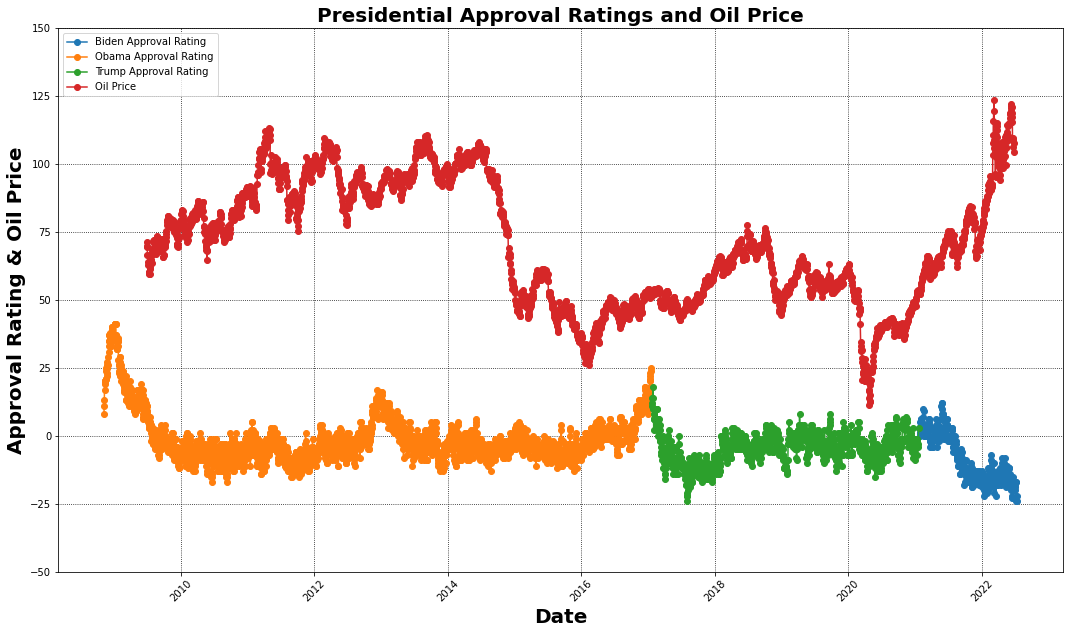

In [105]:
# fig = plt.figure
biden, = plt.plot(df_biden3['Date'], df_biden3['Relative_Approval'],marker='o', label = 'Biden Approval Rating')
obama, = plt.plot(df_obama9b['Date'], df_obama9b['Relative_Approval'],marker='o', label = 'Obama Approval Rating')
trump, = plt.plot(df_trump3['Date'], df_trump3['Relative_Approval'],marker='o', label = 'Trump Approval Rating')
oil, = plt.plot(oil_price_df['Date'], oil_price_df['oil_price'],marker='o', label = 'Oil Price')
plt.title("Presidential Approval Ratings and Oil Price", fontweight='bold', fontsize = '20')
plt.xticks(rotation = 45)
plt.xlabel('Date', fontweight='bold', fontsize = '20')
plt.ylabel('Approval Rating & Oil Price', fontweight='bold', fontsize = '20')
# plt.figure(figsize=(15, 8))
rcParams['figure.figsize']= 18,10
plt.legend(loc=2)
plt.grid(True, color = 'k', linestyle= ":")
plt.ylim(-50, 150)
# fig.savefig("prez_oilp.png")
plt.show()

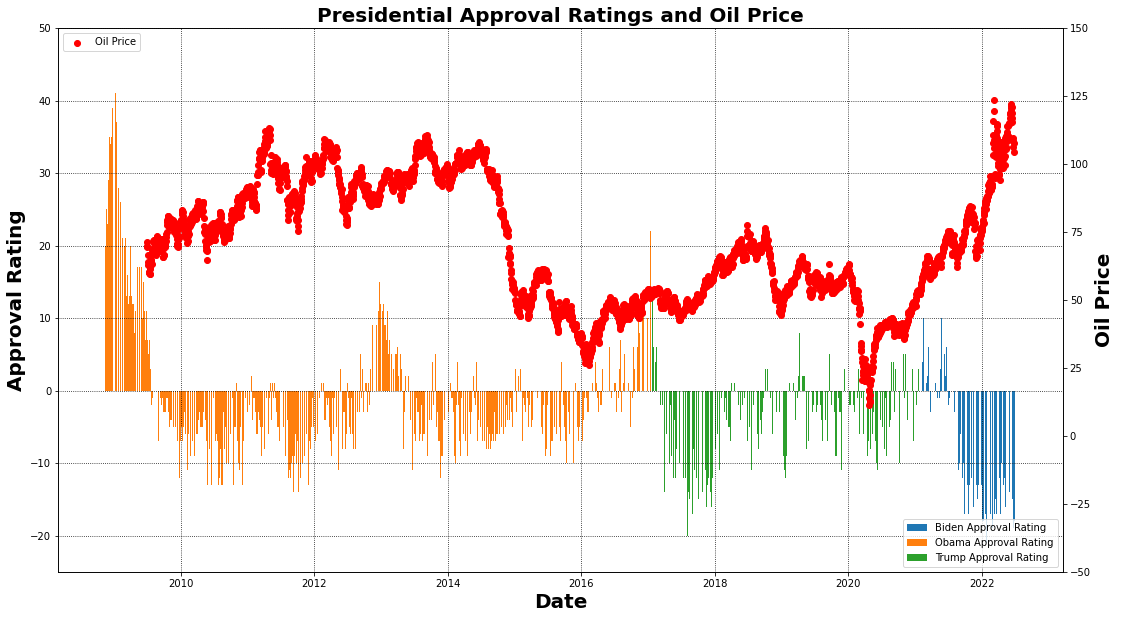

In [118]:
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
# plt.gcf().autofmt_xdate()


fig, ax1 = plt.subplots()
ax1.set_title("Presidential Approval Ratings and Oil Price", fontweight='bold', fontsize = '20')
ax1.bar(df_biden3['Date'], df_biden3['Relative_Approval'], label = 'Biden Approval Rating')
ax1.bar(df_obama9b['Date'], df_obama9b['Relative_Approval'], label = 'Obama Approval Rating')
ax1.bar(df_trump3['Date'], df_trump3['Relative_Approval'], label = 'Trump Approval Rating')
ax1.set_xlabel('Date', fontweight='bold', fontsize = '20')
ax1.set_ylim(-25, 50)
ax1.set_ylabel('Approval Rating', fontweight='bold', fontsize = '20')
ax1.grid(True, color = 'k', linestyle= ":")
ax1.legend(loc=4)

ax2 = ax1.twinx()
ax2.scatter(oil_price_df['Date'], oil_price_df['oil_price'],marker='o',color='red', label = 'Oil Price')
ax2.set_ylabel('Oil Price', fontweight='bold', fontsize = '20')
plt.xticks(rotation = 45)
ax2.set_ylim(-50, 150)


rcParams['figure.figsize']= 18,10
ax2.legend(loc=2)

